In [107]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

In [108]:
test_sentences = ['I love my dog', 'I love my cat', "I love my big fluffy dog"]

In [109]:
tokenizer = Tokenizer(num_words = 100, oov_token="<UNK>") #imagine to get most frequent 100 words (it is automatic)

In [110]:
tokenizer.fit_on_texts(test_sentences)

In [111]:
word_index = tokenizer.word_index

In [112]:
word_index

{'<UNK>': 1,
 'i': 2,
 'love': 3,
 'my': 4,
 'dog': 5,
 'cat': 6,
 'big': 7,
 'fluffy': 8}

In [113]:
#represent sentences as list of numbers

In [114]:
seq = tokenizer.texts_to_sequences(test_sentences) #possibility to use parameter padding='post', it is then situated in the end

In [115]:
seq

[[2, 3, 4, 5], [2, 3, 4, 6], [2, 3, 4, 7, 8, 5]]

In [116]:
padded = pad_sequences(seq)

In [117]:
padded

array([[0, 0, 2, 3, 4, 5],
       [0, 0, 2, 3, 4, 6],
       [2, 3, 4, 7, 8, 5]])

In [118]:
import json

In [119]:
dataset = []
ds = pd.read_json('sarcasm1.json', lines=True)

In [120]:
ds

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry18:06 21.0...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [128]:
headlines = ds.loc[:, 'headline'].values

In [129]:
len(headlines)

26709

In [130]:
tokenizer = Tokenizer(num_words = 100, oov_token="<UNK>") #imagine to get most frequent 100 words (it is automatic)

In [131]:
headlines_seq = seq = tokenizer.texts_to_sequences(headlines)

In [132]:
print(tokenizer.word_index)

{}


In [133]:
print(headlines_seq)

[[None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None], [None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None], [None, None, None, None, None, No

In [127]:
padded_headlines = pad_sequences(headlines_seq, padding='post')

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [ ]:
print(padded_headlines[0])

In [134]:
def split(sentences, labels, train_size):
    training_sentences = sentences[0:train_size]
    testing_sentences = sentences[train_size:]
    training_labels = labels[0:train_size]
    testing_labels = labels[train_size:]
    
    train = (training_sentences, training_labels)
    test = (testing_sentences, testing_labels)
    
    return (train, test)

In [135]:
#config

vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [136]:

train, test = split(ds.loc[:, 'headline'].values, ds.loc[:, 'is_sarcastic'].values, training_size)

In [137]:
training_sentences, training_labels = train
testing_sentences, testing_labels = test

In [138]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [139]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [140]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 160,217
Trainable params: 160,217
Non-trainable params: 0
_________________________________________________________________


In [141]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.6680 - accuracy: 0.5720 - val_loss: 0.6052 - val_accuracy: 0.6831
Epoch 2/30
625/625 - 1s - loss: 0.4757 - accuracy: 0.8067 - val_loss: 0.4143 - val_accuracy: 0.8269
Epoch 3/30
625/625 - 1s - loss: 0.3342 - accuracy: 0.8755 - val_loss: 0.3628 - val_accuracy: 0.8469
Epoch 4/30
625/625 - 1s - loss: 0.2766 - accuracy: 0.8925 - val_loss: 0.3488 - val_accuracy: 0.8559
Epoch 5/30
625/625 - 1s - loss: 0.2359 - accuracy: 0.9107 - val_loss: 0.3465 - val_accuracy: 0.8562
Epoch 6/30
625/625 - 1s - loss: 0.2066 - accuracy: 0.9235 - val_loss: 0.3498 - val_accuracy: 0.8533
Epoch 7/30
625/625 - 1s - loss: 0.1850 - accuracy: 0.9297 - val_loss: 0.3552 - val_accuracy: 0.8539
Epoch 8/30
625/625 - 1s - loss: 0.1660 - accuracy: 0.9391 - val_loss: 0.3694 - val_accuracy: 0.8568
Epoch 9/30
625/625 - 1s - loss: 0.1489 - accuracy: 0.9457 - val_loss: 0.4070 - val_accuracy: 0.8427
Epoch 10/30
625/625 - 1s - loss: 0.1356 - accuracy: 0.9510 - val_loss: 0.4327 - val_accuracy: 0.8369

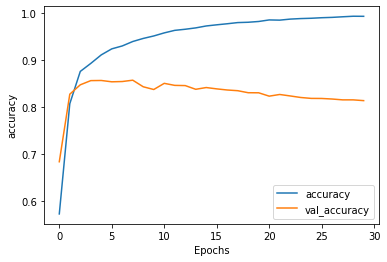

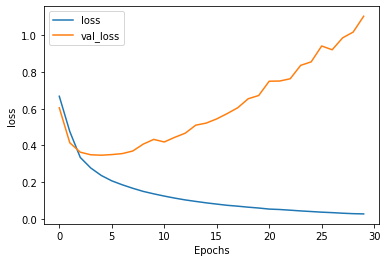

In [142]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))


In [144]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [143]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night", "terrible bad not good", "great super awesome"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[6.5022045e-01]
 [4.2148126e-06]
 [9.9264938e-01]
 [2.6491356e-01]]
